In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string
import nltk
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

ModuleNotFoundError: No module named 'Sastrawi'

In [ ]:
data = pd.read_csv('Semua.csv')
data

,created_at,full_text
0,Mon Mar 25 12:04:56 +0000 2024,@henrdeyjo Sukses Pemilu Damai adalah hasil da...
1,Mon Mar 25 12:01:16 +0000 2024,@marsieles_monly Menerima hasil Pemilu Damai a...
2,Mon Mar 25 11:56:20 +0000 2024,"@marsieles_monly Dalam keberagaman politik, ma..."
3,Mon Mar 25 11:56:15 +0000 2024,@henrdeyjo Mari kita sambut hasil pemilu denga...
4,Mon Mar 25 11:55:16 +0000 2024,@HisyamMochtar Demi kelangasungan hidup Berban...
...,...,...
1495,Wed Mar 20 21:33:32 +0000 2024,Bodolah siapapun presidennya semoga amanah dan...
1496,Wed Mar 20 21:31:53 +0000 2024,Hasil pilpres dah fix ya? Hmm ya yaudah lah yg...
1497,Wed Mar 20 21:31:49 +0000 2024,Saya memohon kepada Allah SWT dengan perantara...
1498,Wed Mar 20 21:28:22 +0000 2024,@tvOneNews Lihatlah ini @jokowi ... Rakyat men...


**CASE FOLDING**

In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

data['case_folding'] = data['full_text'].apply(case_folding)
data

,full_text,case_folding
0,@henrdeyjo Sukses Pemilu Damai adalah hasil da...,@henrdeyjo sukses pemilu damai adalah hasil da...
1,@marsieles_monly Menerima hasil Pemilu Damai a...,@marsieles_monly menerima hasil pemilu damai a...
2,"@marsieles_monly Dalam keberagaman politik, ma...","@marsieles_monly dalam keberagaman politik, ma..."
3,@henrdeyjo Mari kita sambut hasil pemilu denga...,@henrdeyjo mari kita sambut hasil pemilu denga...
4,@HisyamMochtar Demi kelangasungan hidup Berban...,@hisyammochtar demi kelangasungan hidup berban...
...,...,...
1495,Bodolah siapapun presidennya semoga amanah dan...,bodolah siapapun presidennya semoga amanah dan...
1496,Hasil pilpres dah fix ya? Hmm ya yaudah lah yg...,hasil pilpres dah fix ya? hmm ya yaudah lah yg...
1497,Saya memohon kepada Allah SWT dengan perantara...,saya memohon kepada allah swt dengan perantara...
1498,@tvOneNews Lihatlah ini @jokowi ... Rakyat men...,@tvonenews lihatlah ini @jokowi ... rakyat men...


In [ ]:
del(data['full_text'])
data

,case_folding
0,@henrdeyjo sukses pemilu damai adalah hasil da...
1,@marsieles_monly menerima hasil pemilu damai a...
2,"@marsieles_monly dalam keberagaman politik, ma..."
3,@henrdeyjo mari kita sambut hasil pemilu denga...
4,@hisyammochtar demi kelangasungan hidup berban...
...,...
1495,bodolah siapapun presidennya semoga amanah dan...
1496,hasil pilpres dah fix ya? hmm ya yaudah lah yg...
1497,saya memohon kepada allah swt dengan perantara...
1498,@tvonenews lihatlah ini @jokowi ... rakyat men...


**CLEANING**

In [ ]:
def remove_URL(tweet):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', tweet)

def remove_html(tweet):
  html = re.compile(r'<.*?>')
  return html.sub(r'', tweet)

def remove_emoji(tweet):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
                              "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)

def remove_mentions(tweet):
  tweet = re.sub(r'@[a-zA-Z0-9_]+','', tweet)
  return tweet

def remove_hashtag(tweet):
  tweet = re.sub(r'#\w+','', tweet)
  return tweet

def remove_symbols(tweet):
  tweet = re.sub(r'[^a-zA-Z0-9\s]','', tweet) # Menghapus semua simbol
  return tweet

def remove_numbers(tweet):
  tweet = re.sub(r'\d+', '', tweet)
  return tweet

data['cleaning'] = data['case_folding'].apply(lambda x: remove_URL(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_html(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_emoji(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_mentions(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_hashtag(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_symbols(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_numbers(x))

data

,case_folding,cleaning
0,@henrdeyjo sukses pemilu damai adalah hasil da...,sukses pemilu damai adalah hasil dari kerja k...
1,@marsieles_monly menerima hasil pemilu damai a...,menerima hasil pemilu damai adalah bukti nyat...
2,"@marsieles_monly dalam keberagaman politik, ma...",dalam keberagaman politik mari bersatu dengan...
3,@henrdeyjo mari kita sambut hasil pemilu denga...,mari kita sambut hasil pemilu dengan sikap de...
4,@hisyammochtar demi kelangasungan hidup berban...,demi kelangasungan hidup berbangsa dan berneg...
...,...,...
1495,bodolah siapapun presidennya semoga amanah dan...,bodolah siapapun presidennya semoga amanah dan...
1496,hasil pilpres dah fix ya? hmm ya yaudah lah yg...,hasil pilpres dah fix ya hmm ya yaudah lah yg ...
1497,saya memohon kepada allah swt dengan perantara...,saya memohon kepada allah swt dengan perantara...
1498,@tvonenews lihatlah ini @jokowi ... rakyat men...,lihatlah ini rakyat menolak hasil pilpres


In [ ]:
del(data['case_folding'])
data

,cleaning
0,sukses pemilu damai adalah hasil dari kerja k...
1,menerima hasil pemilu damai adalah bukti nyat...
2,dalam keberagaman politik mari bersatu dengan...
3,mari kita sambut hasil pemilu dengan sikap de...
4,demi kelangasungan hidup berbangsa dan berneg...
...,...
1495,bodolah siapapun presidennya semoga amanah dan...
1496,hasil pilpres dah fix ya hmm ya yaudah lah yg ...
1497,saya memohon kepada allah swt dengan perantara...
1498,lihatlah ini rakyat menolak hasil pilpres


**STOPWORD**

In [ ]:
# Fungsi penggantian kata tidak baku
def replace_taboo_words (text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash (word))
            else:
                replaced_words.append(word)
                replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text

In [ ]:
# Baca kamus data tidak baku
kamus_data = pd.read_csv('normalisasi.csv')
kamus_tidak_baku = dict(zip(kamus_data['kata_tidak_baku'],kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi penggantian kata tidak baku
data['cleaning']=data['cleaning'].apply(lambda x:replace_taboo_words(x, kamus_tidak_baku))

In [ ]:
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

data['stopword'] = data['cleaning'].apply(lambda x: stopword(x))
data

,cleaning,stopword
0,sukses pemilu damai adalah hasil dari kerja ke...,sukses pemilu damai hasil kerja keras bersama ...
1,menerima hasil pemilu damai adalah bukti nyata...,menerima hasil pemilu damai bukti nyata kedewa...
2,dalam keberagaman politik mari bersatu dengan ...,keberagaman politik bersatu menerima hasil pem...
3,mari kita sambut hasil pemilu dengan sikap dew...,kita sambut hasil pemilu sikap dewasa damai be...
4,demi kelangasungan hidup berbangsa dan bernega...,kelangasungan hidup berbangsa bernegara bangsa...
...,...,...
1495,bodolah siapapun presidennya semoga amanah dan...,bodolah siapapun presidennya semoga amanah bis...
1496,hasil pilpres sudah fix ya hmm ya yaudah lah y...,hasil pilpres fix hmm yaudah lah penting bangg...
1497,saya memohon kepada allah swt dengan perantara...,memohon allah swt perantara kedzoliman dialami...
1498,lihatlah ini rakyat menolak hasil pilpres,lihatlah rakyat menolak hasil pilpres


In [ ]:
del(data['cleaning'])
data

,stopword
0,sukses pemilu damai hasil kerja keras bersama ...
1,menerima hasil pemilu damai bukti nyata kedewa...
2,keberagaman politik bersatu menerima hasil pem...
3,kita sambut hasil pemilu sikap dewasa damai be...
4,kelangasungan hidup berbangsa bernegara bangsa...
...,...
1495,bodolah siapapun presidennya semoga amanah bis...
1496,hasil pilpres fix hmm yaudah lah penting bangg...
1497,memohon allah swt perantara kedzoliman dialami...
1498,lihatlah rakyat menolak hasil pilpres


**TOKENIZING**

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

data['tokenize'] = data['stopword'].apply(tokenize)
data

,stopword,tokenize
0,sukses pemilu damai hasil kerja keras bersama ...,"[sukses, pemilu, damai, hasil, kerja, keras, b..."
1,menerima hasil pemilu damai bukti nyata kedewa...,"[menerima, hasil, pemilu, damai, bukti, nyata,..."
2,keberagaman politik bersatu menerima hasil pem...,"[keberagaman, politik, bersatu, menerima, hasi..."
3,kita sambut hasil pemilu sikap dewasa damai be...,"[kita, sambut, hasil, pemilu, sikap, dewasa, d..."
4,kelangasungan hidup berbangsa bernegara bangsa...,"[kelangasungan, hidup, berbangsa, bernegara, b..."
...,...,...
1495,bodolah siapapun presidennya semoga amanah bis...,"[bodolah, siapapun, presidennya, semoga, amana..."
1496,hasil pilpres fix hmm yaudah lah penting bangg...,"[hasil, pilpres, fix, hmm, yaudah, lah, pentin..."
1497,memohon allah swt perantara kedzoliman dialami...,"[memohon, allah, swt, perantara, kedzoliman, d..."
1498,lihatlah rakyat menolak hasil pilpres,"[lihatlah, rakyat, menolak, hasil, pilpres]"


In [ ]:
del(data['stopword'])
data

,tokenize
0,"[sukses, pemilu, damai, hasil, kerja, keras, b..."
1,"[menerima, hasil, pemilu, damai, bukti, nyata,..."
2,"[keberagaman, politik, bersatu, menerima, hasi..."
3,"[kita, sambut, hasil, pemilu, sikap, dewasa, d..."
4,"[kelangasungan, hidup, berbangsa, bernegara, b..."
...,...
1495,"[bodolah, siapapun, presidennya, semoga, amana..."
1496,"[hasil, pilpres, fix, hmm, yaudah, lah, pentin..."
1497,"[memohon, allah, swt, perantara, kedzoliman, d..."
1498,"[lihatlah, rakyat, menolak, hasil, pilpres]"


**Stemming**

In [ ]:
def stemming (text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

data['stemming'] = data['tokenize'].apply(stemming)
data

sukses milu damai hasil kerja keras sama jaga damai stabilitas
terima hasil milu damai bukti nyata dewasa politik dalam semangat milu damai
agam politik satu terima hasil milu positif milu damai
kita sambut hasil milu sikap dewasa damai bentuk nyata semangat milu damai
kelangasungan hidup bangsa negara bangsa indonesia mnjadikan momentum milu gugur paslon indonesia lebih baik terima putus kpu hasil milu curang akan hasil pimpin khianat
hasil milu damai amanah rakyat harus harga semua pihak
sedia untuk terima hasil milu cermin semangat milu damai hormat demokrasi
menko polhukam bicara teroris jelang lebaran idulfitri tutup hasil milu prabowo gibran
kita terima hasil milu lapang dada wujud citacita milu damai
sama kita sambut hasil milu wujud nyata semangat milu damai
engak pikir iq kalau pasti laksana milu itu langgar tentu ada langgar curang tuduh tidak ada seleweng dana bansos kampanye cawapres ha
milu damai bukan mimpi hasil tindak nyata semua
terima hasil milu lapang dada modal utam

,tokenize,stemming
0,"[sukses, pemilu, damai, hasil, kerja, keras, b...",sukses milu damai hasil kerja keras sama jaga ...
1,"[menerima, hasil, pemilu, damai, bukti, nyata,...",terima hasil milu damai bukti nyata dewasa pol...
2,"[keberagaman, politik, bersatu, menerima, hasi...",agam politik satu terima hasil milu positif mi...
3,"[kita, sambut, hasil, pemilu, sikap, dewasa, d...",kita sambut hasil milu sikap dewasa damai bent...
4,"[kelangasungan, hidup, berbangsa, bernegara, b...",kelangasungan hidup bangsa negara bangsa indon...
...,...,...
1495,"[bodolah, siapapun, presidennya, semoga, amana...",bodolah siapa presiden moga amanah bisa bawa p...
1496,"[hasil, pilpres, fix, hmm, yaudah, lah, pentin...",hasil pilpres fix hmm yaudah lah penting bangg...
1497,"[memohon, allah, swt, perantara, kedzoliman, d...",mohon allah swt antara kedzoliman alami banyak...
1498,"[lihatlah, rakyat, menolak, hasil, pilpres]",lihat rakyat tolak hasil pilpres


In [ ]:
# Terapkan fungsi penggantian kata tidak baku
data['stemming']=data['stemming'].apply(lambda x:replace_taboo_words(x, kamus_tidak_baku))
data

,tokenize,stemming
0,"[sukses, pemilu, damai, hasil, kerja, keras, b...",sukses pemilu damai hasil kerja keras sama jag...
1,"[menerima, hasil, pemilu, damai, bukti, nyata,...",terima hasil pemilu damai bukti nyata dewasa p...
2,"[keberagaman, politik, bersatu, menerima, hasi...",agam politik satu terima hasil pemilu positif ...
3,"[kita, sambut, hasil, pemilu, sikap, dewasa, d...",kita sambut hasil pemilu sikap dewasa damai be...
4,"[kelangasungan, hidup, berbangsa, bernegara, b...",kelangasungan hidup bangsa negara bangsa indon...
...,...,...
1495,"[bodolah, siapapun, presidennya, semoga, amana...",bodolah siapa presiden semoga amanah bisa bawa...
1496,"[hasil, pilpres, fix, hmm, yaudah, lah, pentin...",hasil pilpres fix hmm yaudah lah penting bangg...
1497,"[memohon, allah, swt, perantara, kedzoliman, d...",mohon allah swt antara kedzoliman alami banyak...
1498,"[lihatlah, rakyat, menolak, hasil, pilpres]",lihat rakyat tolak hasil pilpres


In [ ]:
del(data['tokenize'])
data

,stemming
0,sukses pemilu damai hasil kerja keras sama jag...
1,terima hasil pemilu damai bukti nyata dewasa p...
2,agam politik satu terima hasil pemilu positif ...
3,kita sambut hasil pemilu sikap dewasa damai be...
4,kelangasungan hidup bangsa negara bangsa indon...
...,...
1495,bodolah siapa presiden semoga amanah bisa bawa...
1496,hasil pilpres fix hmm yaudah lah penting bangg...
1497,mohon allah swt antara kedzoliman alami banyak...
1498,lihat rakyat tolak hasil pilpres


In [ ]:
data.to_csv('Hasil_Preprocessing.csv', encoding='utf8', index = False)

**WordCloud**

In [ ]:
data = pd.read_csv('Hasil_Preprocessing.csv')
data

,stemming,sentimen
0,sukses pemilu damai hasil kerja keras sama jag...,positif
1,terima hasil pemilu damai bukti nyata dewasa p...,positif
2,agam politik satu terima hasil pemilu positif ...,positif
3,kita sambut hasil pemilu sikap dewasa damai be...,positif
4,kelangasungan hidup bangsa negara bangsa indon...,negatif
...,...,...
1495,bodolah siapa presiden semoga amanah bisa bawa...,positif
1496,hasil pilpres fix hmm yaudah lah penting bangg...,positif
1497,mohon allah swt antara kedzoliman alami banyak...,negatif
1498,lihat rakyat tolak hasil pilpres,negatif


In [ ]:
sentimen_count = data['sentimen'].value_counts()
sentimen_count

,count
sentimen,
negatif,647
netral,542
positif,311


**WORCLOUD**

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

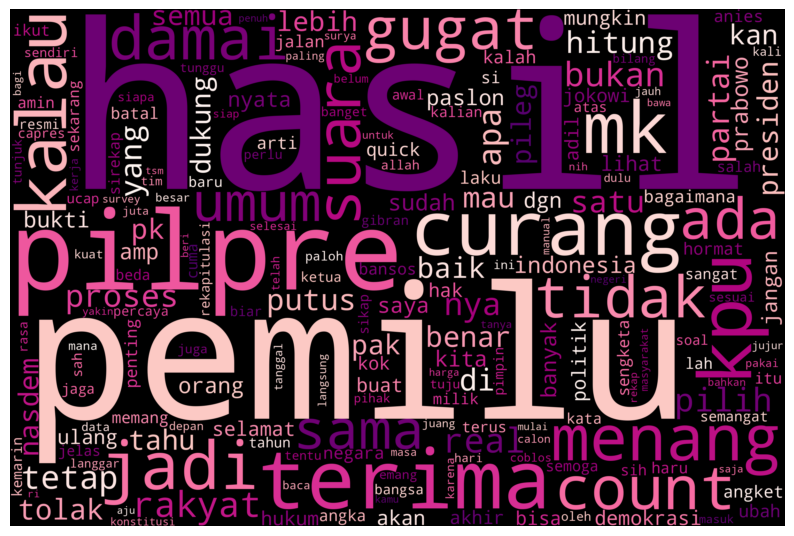

In [ ]:
def plot_cloud (wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data['stemming']])

wordcloud = WordCloud (
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='RdPu',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)
plot_cloud (wordcloud)

**PEMBOBOTAN KATA**

In [ ]:
!pip install pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(data['stemming'],data['sentimen'],test_size=0.2, stratify=data['sentimen'], random_state=42)

tvec = TfidfVectorizer()
clf = MultinomialNB()

**PEMODELAN**

In [ ]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec),('classifier',clf)])
model.fit(x_train,y_train)

hasil = model.predict(x_test)

**EVALUASI MODEL**

[[115  15   0]
 [ 42  66   0]
 [ 13  12  37]]


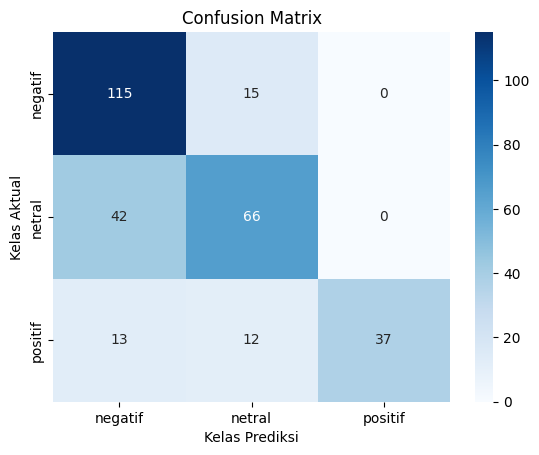

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,hasil)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['negatif', 'netral', 'positif'], yticklabels=['negatif', 'netral', 'positif'])
plt.title('Confusion Matrix')
plt.xlabel('Kelas Prediksi')
plt.ylabel('Kelas Aktual')
plt.show()

In [ ]:
matrix = classification_report(y_test,hasil)
accuracy = accuracy_score(y_test,hasil)
print(matrix)
print(accuracy)

              precision    recall  f1-score   support

     negatif       0.68      0.88      0.77       130
      netral       0.71      0.61      0.66       108
     positif       1.00      0.60      0.75        62

    accuracy                           0.73       300
   macro avg       0.80      0.70      0.72       300
weighted avg       0.76      0.73      0.72       300

0.7266666666666667


In [ ]:
# Inferensi dengan teks baru
new_texts = ["Pemilu Damai"]
new_predictions = model.predict(new_texts)

# Hasil prediksi
print(f"Prediksi Sentimen: {new_predictions[0]}")